<a href="https://colab.research.google.com/github/fathimasalim25/data-science-assignment/blob/main/Kmenas_clustering_and_Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv('/content/fish.csv')
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [ ]:
data.columns


Index(['Bream', '242.0', '23.2', '25.4', '30.0', '38.4', '13.4'], dtype='object')

In [ ]:
data.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


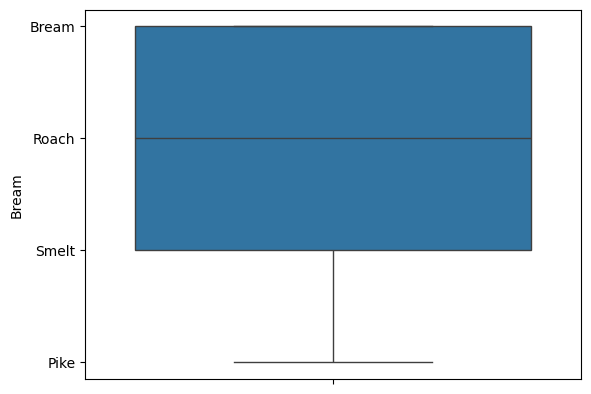

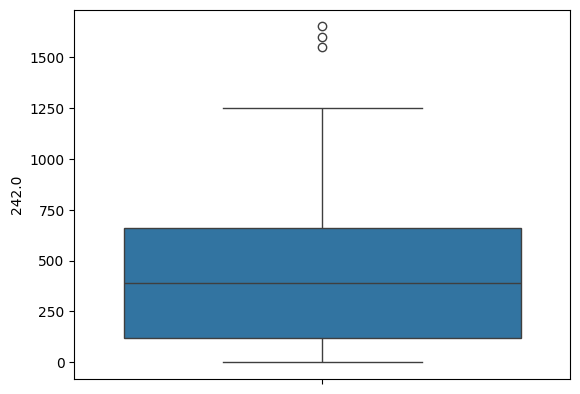

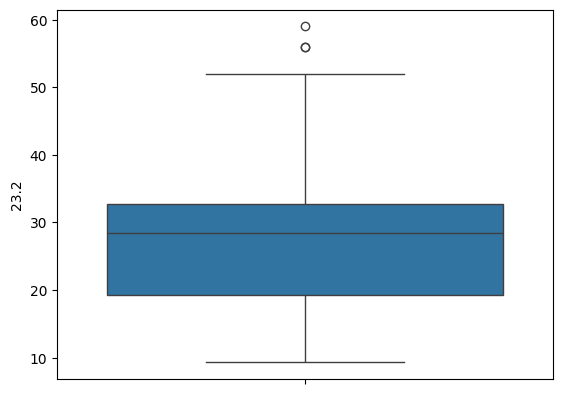

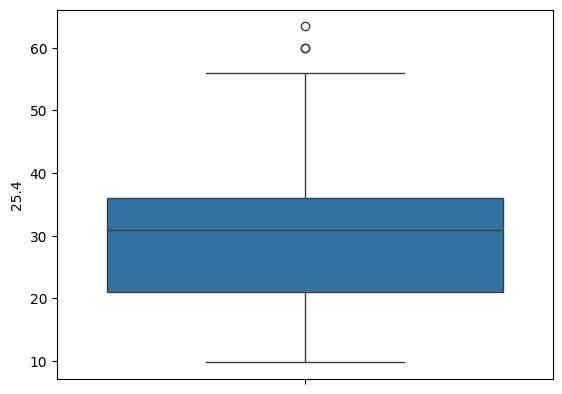

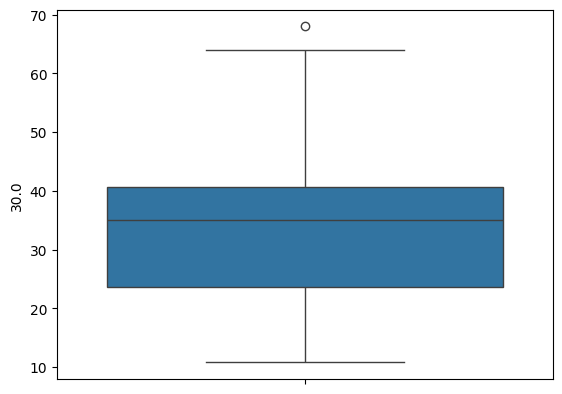

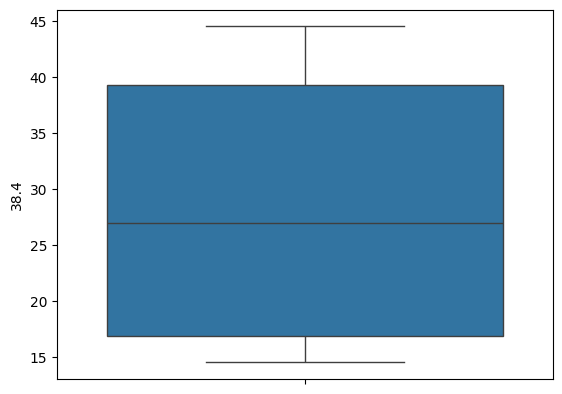

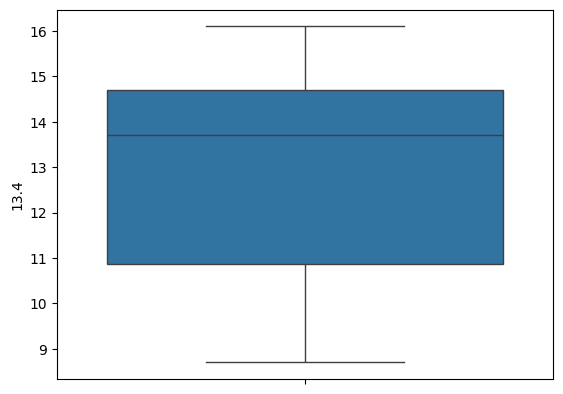

In [ ]:
for col in data.columns:
  sns.boxplot(data = data[col])
  plt.show()

In [ ]:
data.isnull().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


In [ ]:
outlier_columns = []
for col in data.columns:
  if pd.api.types.is_numeric_dtype(data[col]):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    if data[col].min() < lower_limit or data[col].max() > upper_limit:
      outlier_columns.append(col)
print(outlier_columns)

['242.0', '23.2', '25.4', '30.0']


In [ ]:
for col in outlier_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  data[col] = data[col].clip(lower = lower_limit, upper = upper_limit)

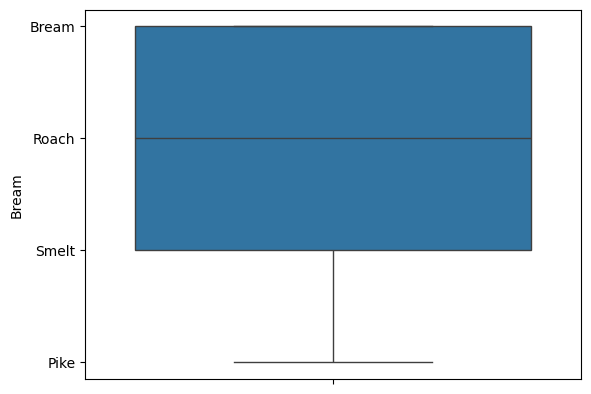

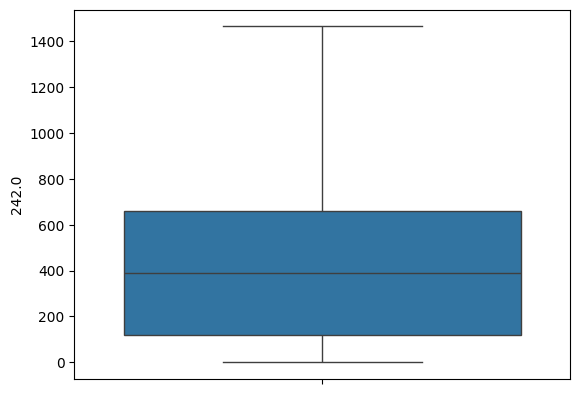

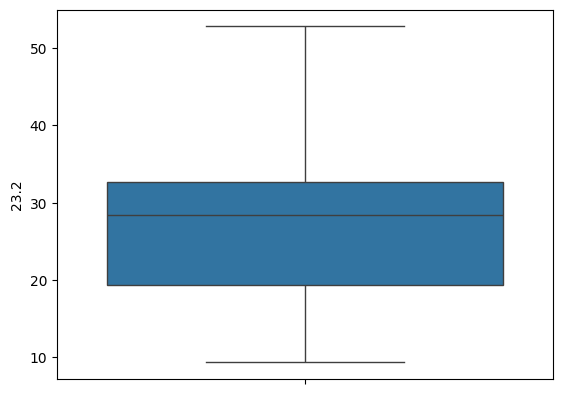

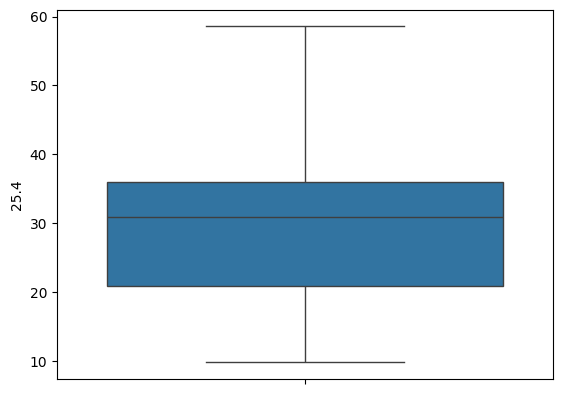

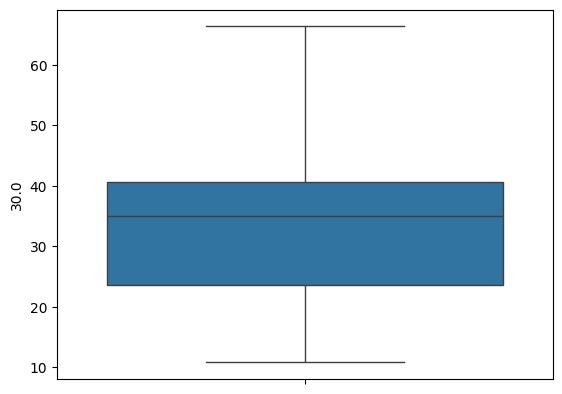

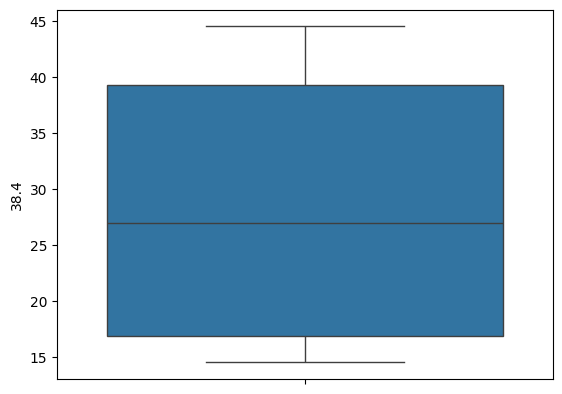

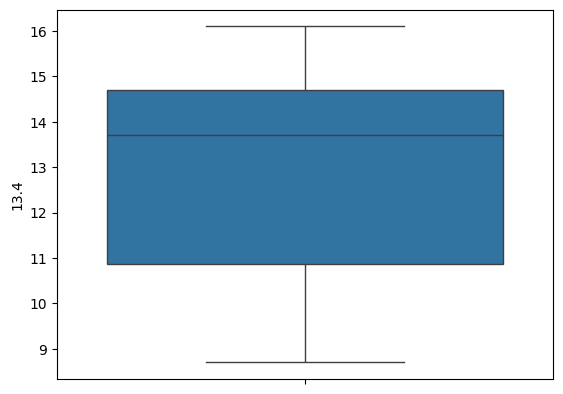

In [ ]:
for col in data.columns:
  sns.boxplot(data = data[col])
  plt.show()

In [ ]:
columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
data.columns = columns
X = data[['Weight', 'Length1']]
X.isnull().sum()
X_clean = X.dropna()
X_clean.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include=['number'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numeric_data)

In [ ]:
data_scaled = pd.DataFrame(x_scaled, columns=numeric_data.columns)
data_scaled

,Weight,Length1,Length2,Length3,Height,Width
0,-0.380263,-0.296988,-0.269256,-0.147434,1.170768,0.444320
1,-0.243627,-0.306157,-0.252510,-0.155043,1.151330,1.058494
2,-0.180774,-0.086097,-0.043186,0.027571,0.976392,0.208099
3,0.002318,-0.067759,-0.043186,0.065616,0.840329,1.058494
4,0.056972,-0.040252,0.015425,0.118878,1.093017,0.633297
...,...,...,...,...,...,...
79,1.423331,1.931118,1.857480,1.671099,-1.142305,-0.784028
80,2.243147,2.270377,2.217518,2.021109,-0.977086,-0.547807
81,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934
82,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934


Kmeans Clustering


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
pred_cluster = kmeans.predict(data_scaled)

In [ ]:
pred_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

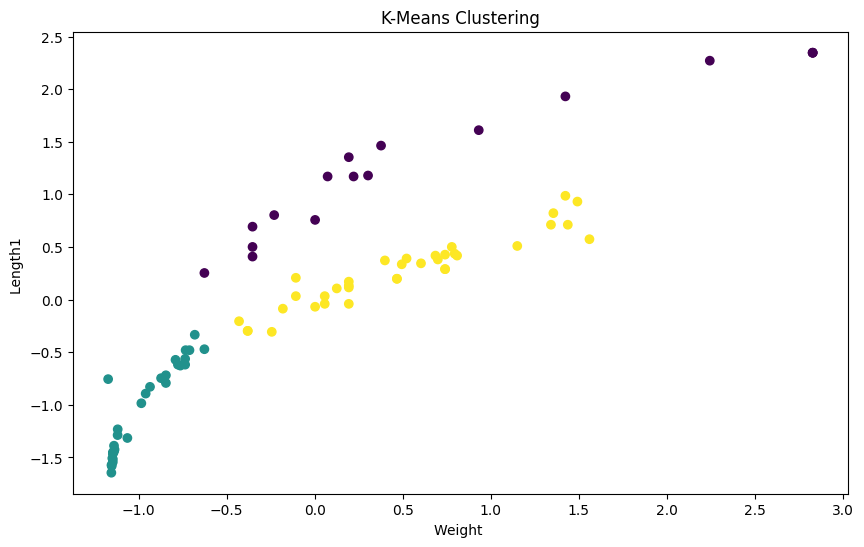

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['Weight'], data_scaled['Length1'], c=pred_cluster)
plt.xlabel('Weight ')
plt.ylabel('Length1 ')
plt.title('K-Means Clustering')
plt.show()

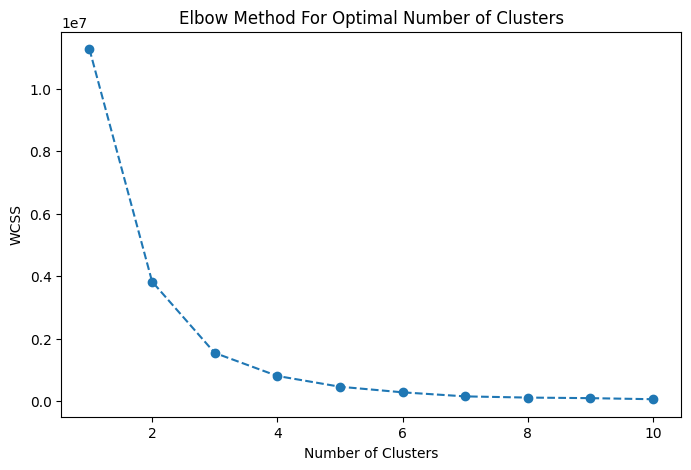

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clean)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Agglomerative Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo_cluster = AgglomerativeClustering(metric = 'euclidean', linkage = 'ward')
y_agglo = agglo_cluster.fit_predict(data_scaled)

In [ ]:
y_agglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

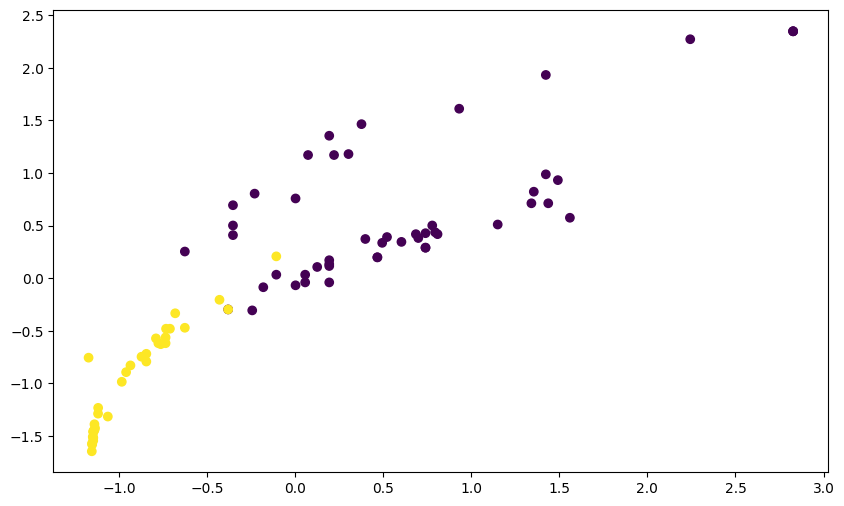

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['Weight'], data_scaled['Length1'], c=y_agglo)

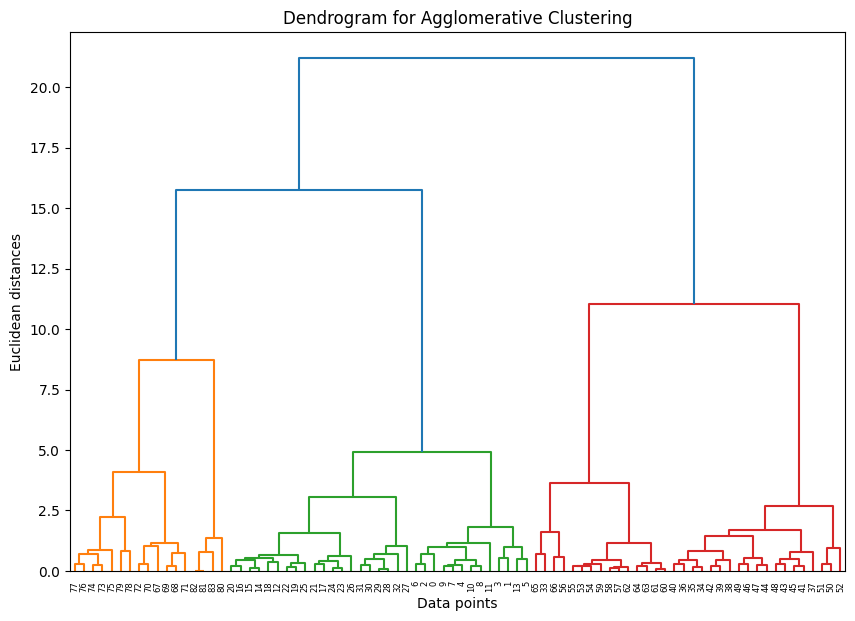

In [ ]:
linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

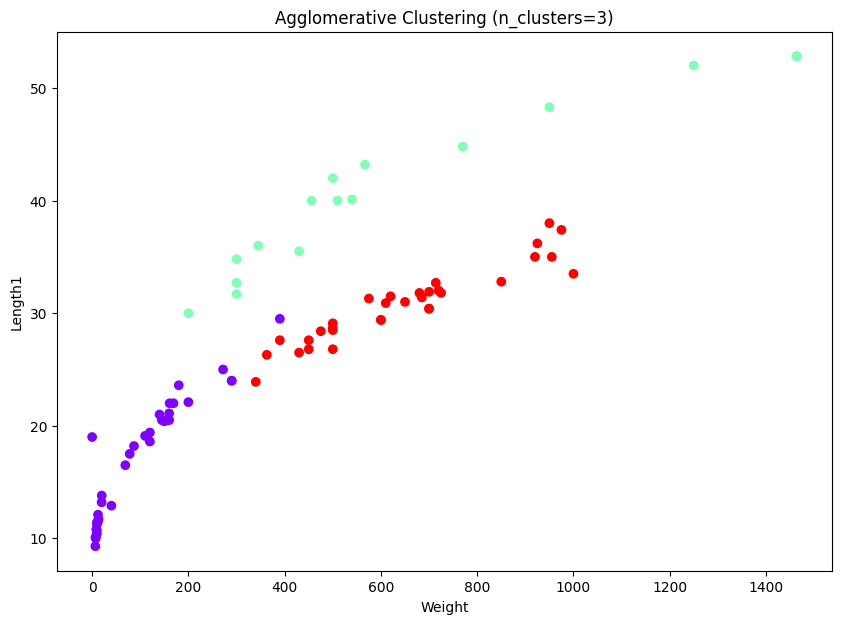

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
agglo_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agglo_clustering.fit_predict(x_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(X['Weight'], X['Length1'], c=clusters, cmap='rainbow')
plt.title(f'Agglomerative Clustering (n_clusters={n_clusters})')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()